In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Loading dataset
df = pd.read_csv('Life_Expectancy_00_15.csv', sep=';')

In [3]:
df.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [83]:
grouped_countries = df\
    .groupby('Country')\
    ['Population']\
    .sum().to_frame()\
    .sort_values(by='Population', ascending = False)[0:10]

In [84]:
grouped_countries.head()

,Population
Country,
China,21139800000
India,19017685730
United States,4833636559
Indonesia,3749685023
Brazil,3048468286


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least Developed                                      1904 non-null   bool   
 4   Life Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2 emissions                                        1904 non-null   float64
 7   Health expenditure                                   1904 non-null   float64
 8   Electric power consumption                           1904 non-null  

## Pandas

#### 10 Most Populous Contries

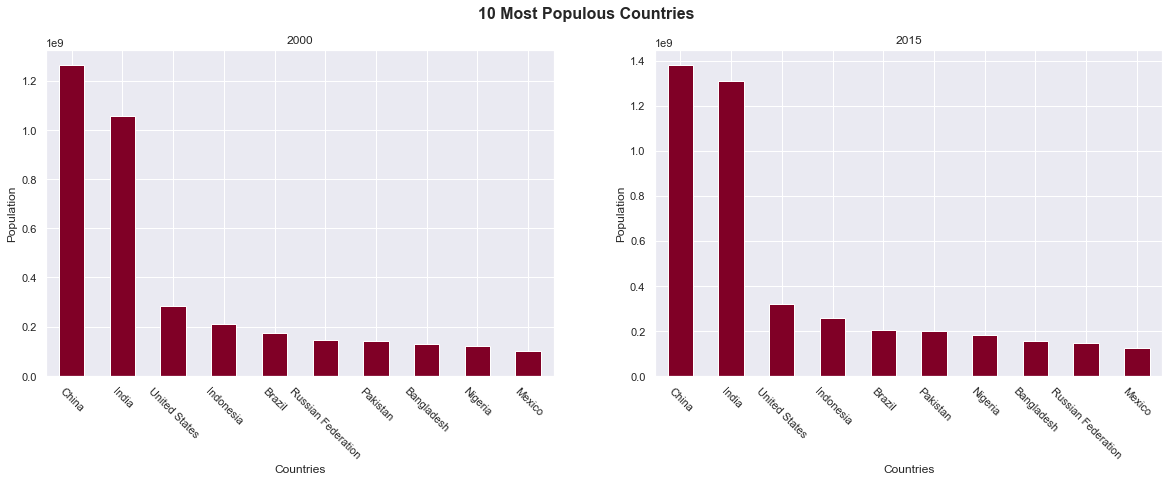

In [74]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Filtering dataframe
df_2000 = df[df.loc[:,'Year']==2000].copy()
df_2015 = df[df.loc[:,'Year']==2015].copy()

# Setting background style
sns.set(style='darkgrid')

# Pandas plot
df_2000.sort_values(by='Population', ascending=False)[0:10].plot(ax=ax_1, x='Country', y='Population', kind='bar', title='2000',
            xlabel='Countries', ylabel='Population',
            legend=False, 
            colormap='YlOrRd_r')

# Pandas plot
df_2015.sort_values(by='Population', ascending=False)[0:10].plot(ax=ax_2, x='Country', y='Population', kind='bar', title='2015',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Labels
countries_2000 = df_2000.sort_values(by='Population', ascending=False)[0:10]['Country'].values
countries_2015 = df_2015.sort_values(by='Population', ascending=False)[0:10]['Country'].values

# Adding some plt customization
plt.suptitle('10 Most Populous Countries', fontweight='bold', fontsize=16)
ax_1.set_xticks(ticks=[i for i in range(10)],labels=countries_2000,rotation=-45)
ax_2.set_xticks(ticks=[i for i in range(10)],labels=countries_2015,rotation=-45)
plt.show()

#### Population Difference

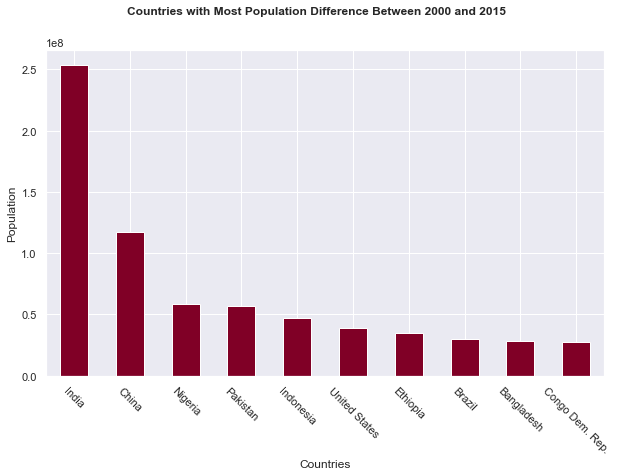

In [60]:
# Calculating population difference
df_2015['pop_difference'] = df_2015.loc[:,'Population'].values-df_2000.loc[:,'Population'].values

# Figure and axe:
fig, ax = plt.subplots(figsize=(10,6))

# Setting background style
sns.set(style='darkgrid')

# Pandas plot
df_2015.sort_values(by='pop_difference', ascending=False)[0:10].plot(ax =ax, x='Country', y='pop_difference', kind='bar',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Adding some plt customization
plt.suptitle('Countries with Most Population Difference Between 2000 and 2015', fontweight='bold', fontsize=12)
plt.xticks(rotation=-45)
plt.show()

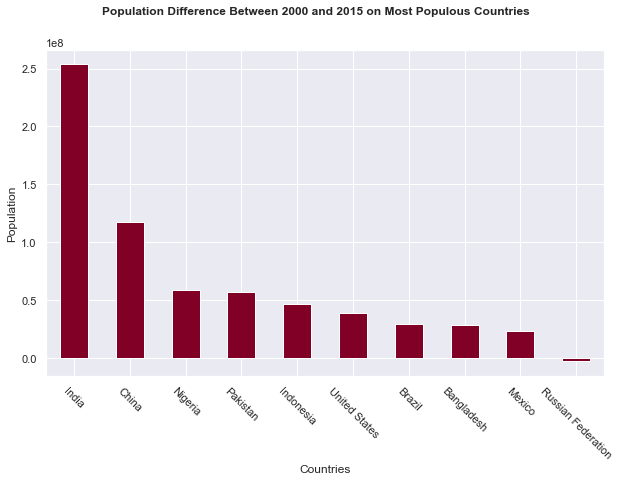

In [61]:
# Calculating population difference
df_2015['pop_difference'] = df_2015['Population'].values-df_2000['Population'].values

# Figure and axe:
fig, ax = plt.subplots(figsize=(10,6))

# Setting background style
sns.set(style='darkgrid')

# Pandas plot
df_2015.sort_values(by='Population', ascending=False)\
    [0:10].sort_values(by='pop_difference', ascending=False).plot(ax =ax, x='Country', y='pop_difference', kind='bar',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Adding some plt customization
plt.suptitle('Population Difference Between 2000 and 2015 on Most Populous Countries', fontweight='bold', fontsize=12)
plt.xticks(rotation=-45)
plt.show()

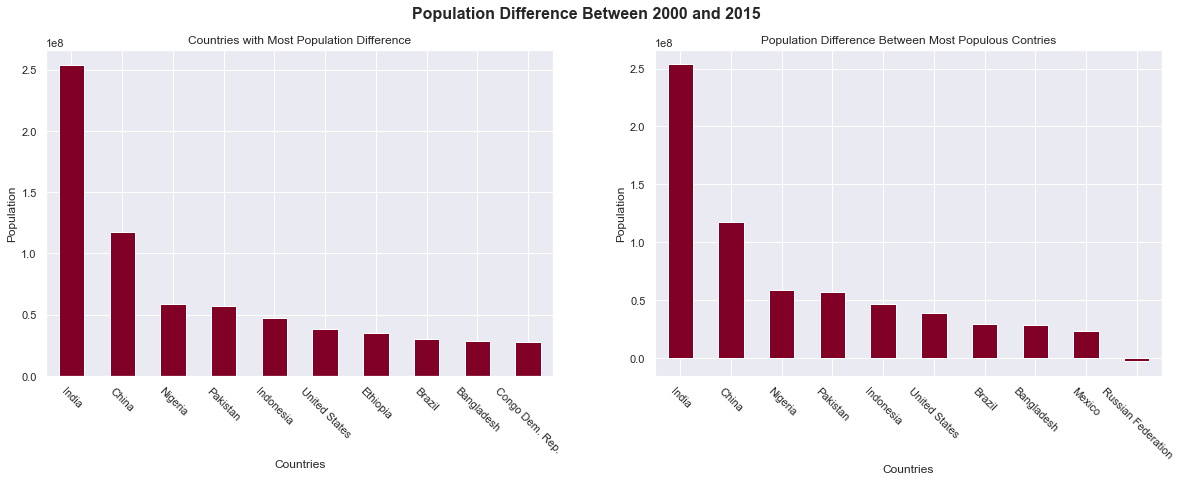

In [62]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Setting background style
sns.set(style='darkgrid')

# Pandas plot
# Plotting top 10 countries with larger difference population between 2000 and 2015
df_2015.sort_values(by='pop_difference', ascending=False)[0:10].plot(ax =ax_1, x='Country', y='pop_difference', kind='bar',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Pandas plot
# Plotting the difference population between countries most populous
df_2015.sort_values(by='Population', ascending=False)\
    [0:10].sort_values(by='pop_difference', ascending=False).plot(ax =ax_2, x='Country', y='pop_difference', kind='bar',
            xlabel='Countries', ylabel='Population',
            legend=False,
            colormap='YlOrRd_r')

# Labels
countries_ax_1 = df_2015.sort_values(by='pop_difference', ascending=False)[0:10]['Country'].values
countries_ax_2 = df_2015.sort_values(by='Population', ascending=False)\
    [0:10].sort_values(by='pop_difference', ascending=False)['Country'].values

# Adding some plt customization
plt.suptitle('Population Difference Between 2000 and 2015', fontweight='bold', fontsize=16)
ax_1.set_title('Countries with Most Population Difference')
ax_1.set_xticks(ticks=[i for i in range(10)],labels=countries_ax_1,rotation=-45)
ax_2.set_title('Population Difference Between Most Populous Contries')
ax_2.set_xticks(ticks=[i for i in range(10)],labels=countries_ax_2,rotation=-45)
plt.show()

In [10]:
df_2015['pop_difference'].head()

351     117215000
767     253576844
1839     38576583
783      46869435
239      29681420
Name: pop_difference, dtype: int64

## Matplotlib

#### 10 Most Populous Countries

C:\Users\cliente\AppData\Local\Temp/ipykernel_7292/3017537149.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(most_populous_2000['Country'], rotation = -45, fontdict={'horizontalalignment':'center'})
C:\Users\cliente\AppData\Local\Temp/ipykernel_7292/3017537149.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(most_populous_2015['Country'], rotation = -45, fontdict={'horizontalalignment':'center'})


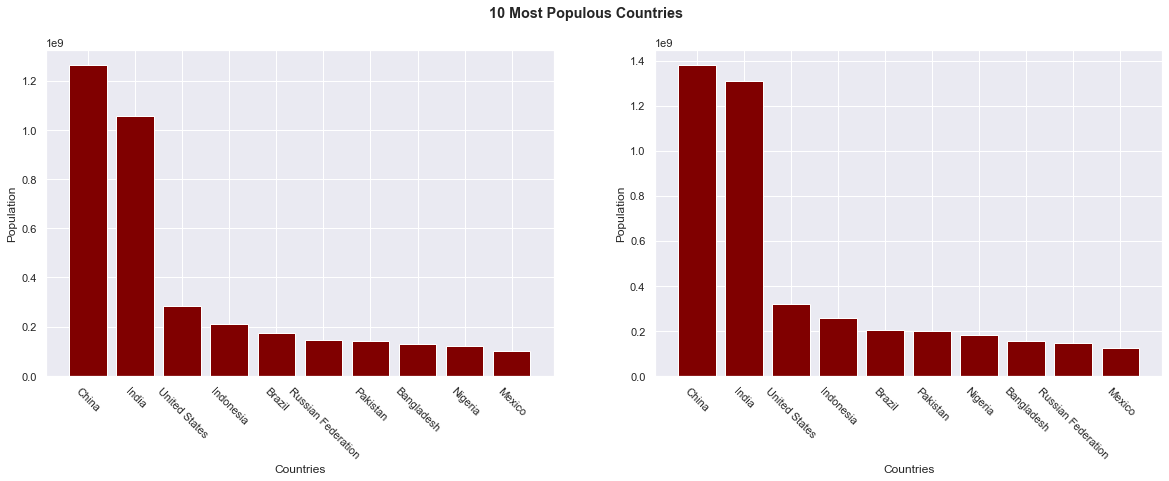

In [75]:
# Creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Figure title
fig.suptitle('10 Most Populous Countries', fontweight='bold')

# Ordening dataframe
most_populous_2000 = df_2000.sort_values(by='Population', ascending=False)[0:10]
most_populous_2015 = df_2015.sort_values(by='Population', ascending=False)[0:10]

# Matplotlib Barplot
ax_1.bar(most_populous_2000['Country'], most_populous_2000['Population'], color='maroon')
ax_2.bar(most_populous_2015['Country'], most_populous_2015['Population'], color='maroon')

# Customizing

# Setting background style
sns.set(style='darkgrid')

ax_1.set_xticklabels(most_populous_2000['Country'], rotation = -45, fontdict={'horizontalalignment':'center'})
ax_1.set_xlabel('Countries')
ax_1.set_ylabel('Population')

ax_2.set_xticklabels(most_populous_2015['Country'], rotation = -45, fontdict={'horizontalalignment':'center'})
ax_2.set_xlabel('Countries')
ax_2.set_ylabel('Population')

plt.show()

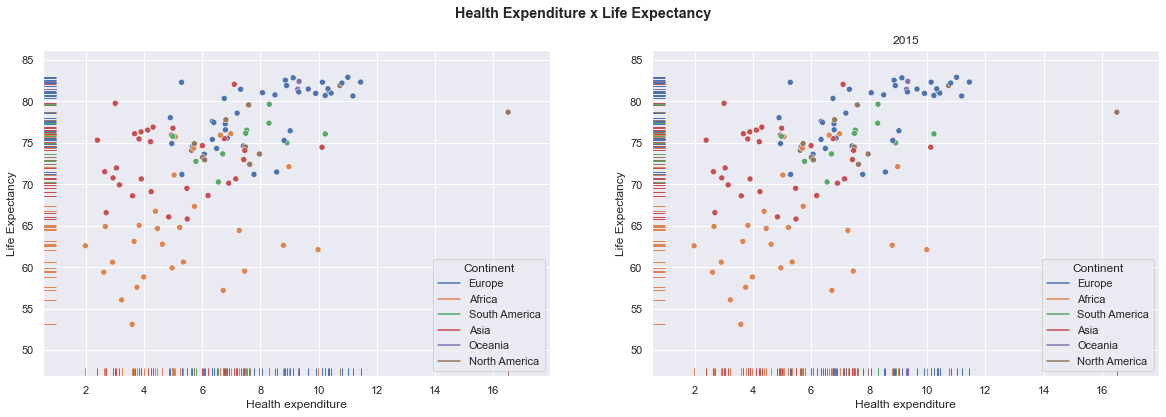

In [136]:
# Creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Figure title
fig.suptitle('Health Expenditure x Life Expectancy', fontweight='bold')

# Filtering dataframes to compare
df_2015 = df[df.loc[:,'Year']==2015].copy()
df_2000 = df[df.loc[:,'Year']==2000].copy()

# Background style
sns.set(style='darkgrid')

# Ax 1 - 2000
sns.scatterplot(ax=ax_1, data = df_2015, x='Health expenditure', y = 'Life Expectancy', hue = 'Continent')
sns.rugplot(ax=ax_1, data = df_2015, x='Health expenditure', y = 'Life Expectancy', hue = 'Continent')
ax_1.set_title('2000')
ax_1.set_xlabel('Health expenditure')
ax_1.set_ylabel('Life Expectancy')

# Ax 2 -  2015
sns.scatterplot(ax=ax_2, data = df_2015, x='Health expenditure', y = 'Life Expectancy', hue = 'Continent')
sns.rugplot(ax=ax_2, data = df_2015, x='Health expenditure', y = 'Life Expectancy', hue = 'Continent')
ax_2.set_title('2015')
ax_2.set_xlabel('Health expenditure')
ax_2.set_ylabel('Life Expectancy')
plt.show()

### Plotly

In [124]:
#teste = df[df.loc[:,'Continent']=='Europe']
teste = df[df.loc[:,'Year']==2015]

#teste=teste.groupby('Country')['Obesity among adults'].mean()

fig = px.scatter(teste, y = 'Life Expectancy', x='Health expenditure', color='Continent', template='seaborn')

fig.update_layout(xaxis_title='Health Expenditure',
                  yaxis_title='Life Expectancy')

fig.show()

In [134]:
df.groupby('Continent')['Life Expectancy'].mean().values.mean()

72.66493861402745

In [130]:
df_2015[df_2015.loc[:,'Continent']=='North America'].sort_values(by='Health expenditure', ascending=False)

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
1839,United States,2015,North America,False,78.690244,320738994,15.560035,16.524073,12993.965580,33.899723,56762.729450,74.554202,3.477845,0.000000,99.447158,36.7,4.13
319,Canada,2015,North America,False,81.900000,35702908,15.648586,10.733205,15588.487150,38.716438,44670.080540,90.000000,1.152709,0.000000,99.229221,30.7,3.70
1263,Nicaragua,2015,North America,False,73.649000,6223234,0.846827,7.963032,568.313718,32.470750,5293.870462,19.704292,0.775537,7.445650,81.353129,21.2,1.44
543,El Salvador,2015,North America,False,72.412000,6325121,1.106698,7.630341,937.074472,29.265444,7597.689174,26.802605,1.056820,2.202425,95.562138,22.1,1.16
415,Costa Rica,2015,North America,False,79.565000,4847805,1.555343,7.591962,1942.490600,57.834508,17090.796580,59.762950,0.000000,0.265891,99.378687,24.8,2.26
735,Honduras,2015,North America,False,74.495000,9112904,1.089664,7.483790,619.837087,57.769506,4823.395396,27.100000,1.671276,7.515632,93.254411,18.7,1.22
1375,Panama,2015,North America,False,77.776000,3968490,2.696240,6.809029,2064.177914,57.621560,25319.216700,51.205425,0.000000,5.033525,92.904366,21.9,5.36
1759,Trinidad and Tobago,2015,North America,False,72.941000,1370332,15.565571,6.078629,7092.958644,44.890838,27651.728170,65.100000,0.833206,0.038231,98.136178,18.9,2.83
719,Guatemala,2015,North America,False,73.250000,15567419,1.049628,6.006021,601.189731,33.462113,8194.440681,28.805942,0.432011,4.739856,92.134034,18.2,0.90
1087,Mexico,2015,North America,False,74.904000,121858251,3.870317,5.722774,2157.323788,34.121716,18301.500470,57.431043,0.466676,2.255109,98.025444,27.8,3.59
